#Preprocess

## Read data and check missing values

In [1]:
!pip install renumics-spotlight sliceguard[all] scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.5/343.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install sliceguard

In [3]:
!pip install transformers


In [1]:
!pip install -q datasets

In [2]:
# The Imports
from sliceguard.data import from_huggingface
df = from_huggingface("Matthijs/snacks")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/4838 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/952 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/955 [00:00<?, ? examples/s]

In [3]:
train_df = df[df['split'] == 'train']
val_df = df[df['split'] == 'val']
test_df = df[df['split'] == 'test']

train_dataset ~ 71%, test_dataset ~ 14%, validation_dataset ~ 15%

###Check duplicated

In [4]:
train_df.duplicated().any()

False

In [5]:
val_df.duplicated().any()

False

In [6]:
test_df.duplicated().any()

False

### Check missing values

In [7]:
train_df.isnull().any()

image    False
label    False
split    False
dtype: bool

In [8]:
test_df.isnull().any()

image    False
label    False
split    False
dtype: bool

In [9]:
val_df.isnull().any()

image    False
label    False
split    False
dtype: bool

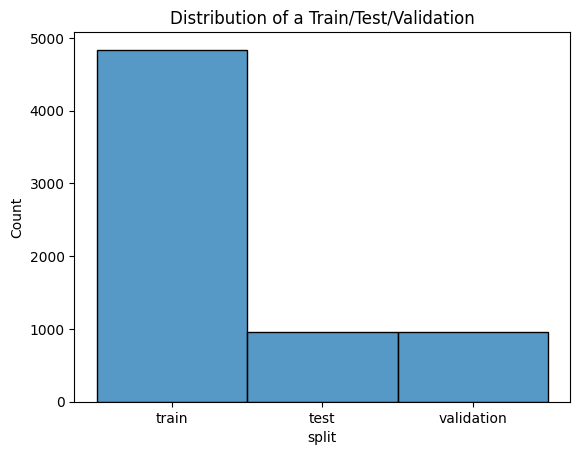

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram cho một đặc điểm
sns.histplot(df['split'], bins=20)
plt.title('Distribution of a Train/Test/Validation')
plt.show()

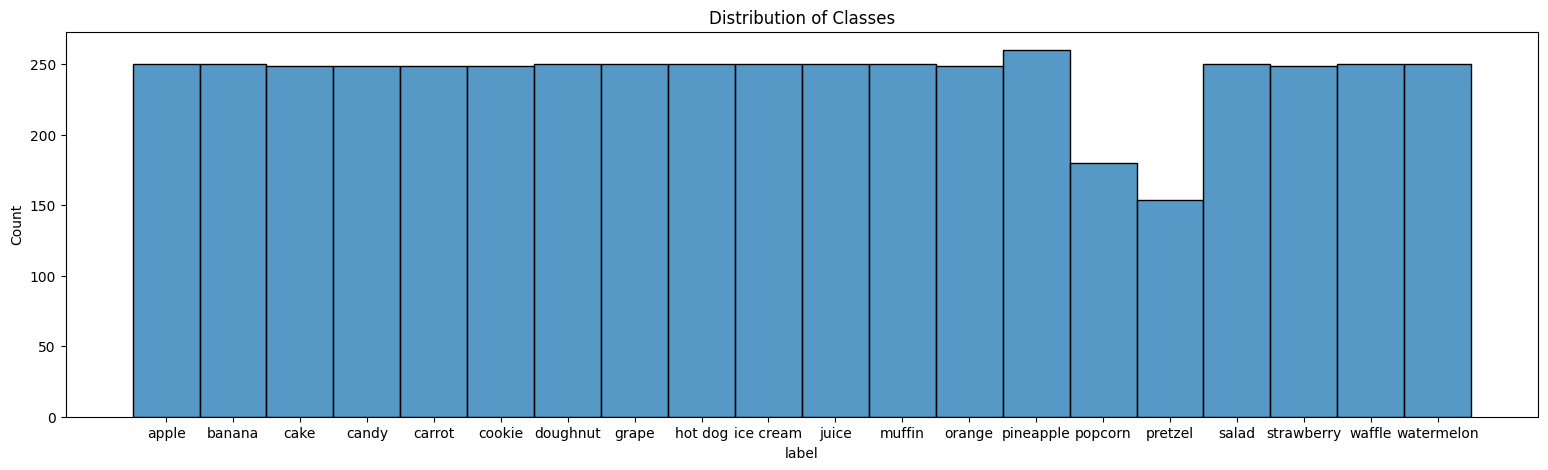

In [11]:
# Giả sử 'data' là DataFrame chứa dữ liệu của bạn
plt.figure(figsize=(19, 5))
sns.histplot(x='label', data=train_df)
plt.title('Distribution of Classes')
plt.show()

The pineapple one will be the highest percentage occuring in all of models

In [12]:
# Load dataset
from datasets import load_dataset
dataset = load_dataset("Matthijs/snacks")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 4838
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 952
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 955
    })
})


##Feature Engineering

### Label Encoder of Label Column

In [13]:
labels = dataset["train"].features['label'].names
print(labels)

['apple', 'banana', 'cake', 'candy', 'carrot', 'cookie', 'doughnut', 'grape', 'hot dog', 'ice cream', 'juice', 'muffin', 'orange', 'pineapple', 'popcorn', 'pretzel', 'salad', 'strawberry', 'waffle', 'watermelon']


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(labels)

LabelEncoder()

In [15]:
label_ids = encoder.transform(labels)
decoded_labels = encoder.inverse_transform(label_ids)

In [16]:
decoded_labels

array(['apple', 'banana', 'cake', 'candy', 'carrot', 'cookie', 'doughnut',
       'grape', 'hot dog', 'ice cream', 'juice', 'muffin', 'orange',
       'pineapple', 'popcorn', 'pretzel', 'salad', 'strawberry', 'waffle',
       'watermelon'], dtype='<U10')

In [17]:
label2id = {label: idx for idx, label in enumerate(encoder.classes_)}
id2label = {idx: label for idx, label in enumerate(encoder.classes_)}

print(label2id)
print(id2label)


{'apple': 0, 'banana': 1, 'cake': 2, 'candy': 3, 'carrot': 4, 'cookie': 5, 'doughnut': 6, 'grape': 7, 'hot dog': 8, 'ice cream': 9, 'juice': 10, 'muffin': 11, 'orange': 12, 'pineapple': 13, 'popcorn': 14, 'pretzel': 15, 'salad': 16, 'strawberry': 17, 'waffle': 18, 'watermelon': 19}
{0: 'apple', 1: 'banana', 2: 'cake', 3: 'candy', 4: 'carrot', 5: 'cookie', 6: 'doughnut', 7: 'grape', 8: 'hot dog', 9: 'ice cream', 10: 'juice', 11: 'muffin', 12: 'orange', 13: 'pineapple', 14: 'popcorn', 15: 'pretzel', 16: 'salad', 17: 'strawberry', 18: 'waffle', 19: 'watermelon'}


###Image Columns Transform

Torch is an open source ML library used for creating deep neural networks and is written in the Lua scripting language. It's one of the preferred platforms for deep learning research. The framework is built to speed up the process between research prototyping and deployment.

In [18]:

import torch
import torch.nn as nn

# Create toy image with dim (batch x channel x width x height)
toy_img = torch.rand(1, 3, 48, 48)

# Define conv layer parameters
num_channels = 3
hidden_size = 768 #or emb_dimension
patch_size = 16

# Conv 2D layer
projection = nn.Conv2d(num_channels, hidden_size, kernel_size=patch_size,
             stride=patch_size)

# Forward pass toy img
out_projection = projection(toy_img)

print(f'Original image size: {toy_img.size()}')
print(f'Size after projection: {out_projection.size()}')

Original image size: torch.Size([1, 3, 48, 48])
Size after projection: torch.Size([1, 768, 3, 3])


In [19]:
# Flatten the output after projection with Conv2D layer

patch_embeddings = out_projection.flatten(2).transpose(1, 2)
print(f'Patch embedding size: {patch_embeddings.size()}')

Patch embedding size: torch.Size([1, 9, 768])


In [20]:

# Define [CLS] token embedding with the same emb dimension as the patches
batch_size = 1
cls_token = nn.Parameter(torch.randn(1, 1, hidden_size))
cls_tokens = cls_token.expand(batch_size, -1, -1)

# Prepend [CLS] token in the beginning of patch embedding
patch_embeddings = torch.cat((cls_tokens, patch_embeddings), dim=1)
print(f'Patch embedding size: {patch_embeddings.size()}')

Patch embedding size: torch.Size([1, 10, 768])


In [21]:

# Define position embedding with the same dimension as the patch embedding
position_embeddings = nn.Parameter(torch.randn(batch_size, 10, hidden_size))

# Add position embedding into patch embedding
input_embeddings = patch_embeddings + position_embeddings
print(f'Input embedding size: {input_embeddings.size()}')

Input embedding size: torch.Size([1, 10, 768])


In [22]:
# Define parameters for ViT-base (example)
num_heads = 12
num_layers = 12

# Define Transformer encoders' stack
transformer_encoder_layer = nn.TransformerEncoderLayer(
           d_model=hidden_size, nhead=num_heads,
           dim_feedforward=int(hidden_size * 4),
           dropout=0.1)
transformer_encoder = nn.TransformerEncoder(
           encoder_layer=transformer_encoder_layer,
           num_layers=num_layers)

# Forward pass
output_embeddings = transformer_encoder(input_embeddings)
print(f' Output embedding size: {output_embeddings.size()}')

 Output embedding size: torch.Size([1, 10, 768])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


# Build Model

##ViT model ( Vision Transformer)

In [23]:
from transformers import ViTModel

# Load pretrained model
model_checkpoint = 'google/vit-base-patch16-224-in21k'
model = ViTModel.from_pretrained(model_checkpoint, add_pooling_layer=False)

# Example input image
input_img = torch.rand(batch_size, num_channels, 224, 224)

# Forward pass input image
output_embedding = model(input_img)
print(output_embedding)
print(f"Ouput embedding size: {output_embedding['last_hidden_state'].size()}")

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTModel: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BaseModelOutputWithPooling(last_hidden_state=tensor([[[-0.0313, -0.2601,  0.1027,  ...,  0.2016,  0.0468, -0.3485],
         [ 0.1338, -0.1343,  0.0310,  ..., -0.0312,  0.0871, -0.3899],
         [-0.1768, -0.3312, -0.0174,  ...,  0.2348,  0.0882, -0.3815],
         ...,
         [-0.0630, -0.3399,  0.0366,  ..., -0.0138,  0.1505, -0.3470],
         [-0.1831, -0.2752, -0.0982,  ...,  0.1919,  0.1099, -0.2831],
         [ 0.0848, -0.1519,  0.0328,  ...,  0.0107,  0.0970, -0.2384]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=None, hidden_states=None, attentions=None)
Ouput embedding size: torch.Size([1, 197, 768])


In [24]:
num_labels = 20
# Define linear classifier layer
classifier = nn.Linear(hidden_size, num_labels)

# Forward pass on the output embedding of [CLS] token
output_classification = classifier(output_embedding['last_hidden_state'][:, 0, :])
print(f"Output embedding size: {output_classification.size()}")

Output embedding size: torch.Size([1, 20])


In [25]:
import numpy as np
import torch
import cv2
import torch.nn as nn
from transformers import ViTModel, ViTConfig
from torchvision import transforms
from torch.optim import Adam
from torch.utils.data import DataLoader
from tqdm import tqdm

#Pretrained model checkpoint
model_checkpoint = 'google/vit-base-patch16-224-in21k'

In [26]:
class ImageDataset(torch.utils.data.Dataset):

  def __init__(self, input_data):

      self.input_data = input_data
      # Transform input data
      self.transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((224, 224), antialias=True),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5])
        ])

  def __len__(self):
      return len(self.input_data)

  def get_images(self, idx):
      return self.transform(self.input_data[idx]['image'])

  def get_labels(self, idx):
      return self.input_data[idx]['label']

  def __getitem__(self, idx):
      # Get input data in a batch
      train_images = self.get_images(idx)
      train_labels = self.get_labels(idx)

      return train_images, train_labels

In [27]:
class ViT(nn.Module):

  def __init__(self, config=ViTConfig(), num_labels=20,
               model_checkpoint='google/vit-base-patch16-224-in21k'):

        super(ViT, self).__init__()

        self.vit = ViTModel.from_pretrained(model_checkpoint, add_pooling_layer=False)
        self.classifier = (
            nn.Linear(config.hidden_size, num_labels)
        )

  def forward(self, x):

    x = self.vit(x)['last_hidden_state']
    # Use the embedding of [CLS] token
    output = self.classifier(x[:, 0, :])

    return output

In [30]:
def model_train(dataset, epochs, learning_rate, bs):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # Load nodel, loss function, and optimizer
    model = ViT().to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = Adam(model.parameters(), lr=learning_rate)

    # Load batch image
    train_dataset = ImageDataset(dataset)
    train_dataloader = DataLoader(train_dataset, num_workers=1, batch_size=bs, shuffle=True)

     # Fine tuning loop
    for i in range(epochs):
        total_acc_train = 0
        total_loss_train = 0.0

        for train_image, train_label in tqdm(train_dataloader):
            output = model(train_image.to(device))
            loss = criterion(output, train_label.to(device))
            acc = (output.argmax(dim=1) == train_label.to(device)).sum().item()
            total_acc_train += acc
            total_loss_train += loss.item()

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print(f'Epochs: {i + 1} | Loss: {total_loss_train / len(train_dataset): .3f} | Accuracy: {total_acc_train / len(train_dataset): .3f}')

    return model

# Hyperparameters epochs approximate in 10-100, batch_size can be larger if GPU strong enough
EPOCHS = 10
LEARNING_RATE = 1e-4
BATCH_SIZE = 16

# Train the model
trained_model = model_train(dataset['train'], EPOCHS, LEARNING_RATE, BATCH_SIZE)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTModel: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|          | 0/303 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 303/303 [02:36<00:00,  1.94it/s]


Epochs: 1 | Loss:  0.071 | Accuracy:  0.853


100%|██████████| 303/303 [02:37<00:00,  1.92it/s]


Epochs: 2 | Loss:  0.014 | Accuracy:  0.958


100%|██████████| 303/303 [02:37<00:00,  1.92it/s]


Epochs: 3 | Loss:  0.007 | Accuracy:  0.980


100%|██████████| 303/303 [02:37<00:00,  1.92it/s]


Epochs: 4 | Loss:  0.004 | Accuracy:  0.985


100%|██████████| 303/303 [02:37<00:00,  1.93it/s]


Epochs: 5 | Loss:  0.006 | Accuracy:  0.976


100%|██████████| 303/303 [02:37<00:00,  1.92it/s]


Epochs: 6 | Loss:  0.003 | Accuracy:  0.986


100%|██████████| 303/303 [02:37<00:00,  1.92it/s]


Epochs: 7 | Loss:  0.003 | Accuracy:  0.990


100%|██████████| 303/303 [02:37<00:00,  1.92it/s]


Epochs: 8 | Loss:  0.004 | Accuracy:  0.984


100%|██████████| 303/303 [02:37<00:00,  1.92it/s]


Epochs: 9 | Loss:  0.004 | Accuracy:  0.984


100%|██████████| 303/303 [02:37<00:00,  1.92it/s]

Epochs: 10 | Loss:  0.003 | Accuracy:  0.989


In [31]:

def predict(img):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((224, 224)),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5])
        ])

    img = transform(img)
    output = trained_model(img.unsqueeze(0).to(device))
    prediction = output.argmax(dim=1).item()

    return id2label[prediction]

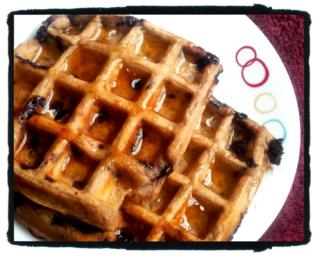

In [32]:
dataset['test'][900]['image']

In [33]:
print(predict(dataset['test'][900]['image']))

waffle


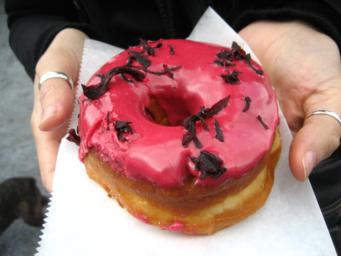

In [34]:
dataset['test'][300]['image']

In [35]:
print(predict(dataset['test'][300]['image']))

cake


##Resnet18 model

In [36]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.5 MB/s eta 0:00:00


In [37]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 11.9 MB/s eta 0:00:00


PyTorch Lightning is the lightweight PyTorch wrapper for ML researchers. Scale your models. Write less boilerplate.

PyTorch is a Python package that provides two high-level features: Tensor computation (like NumPy) with strong GPU acceleration; Deep neural networks built

In [71]:
import torch
import torchvision.models as models
import torch.nn as nn

# Load a pre-trained ResNet
model1 = models.resnet18(pretrained=True)

# Freeze all layers in the network
for param in model.parameters():
    param.requires_grad = False


In [87]:
def model_train(dataset, epochs, learning_rate, bs):
 # Setup the loss function and optimizer
 criterion = nn.CrossEntropyLoss()
 optimizer = torch.optim.Adam(model1.fc.parameters(), lr=0.001)

 # Move the Resnet18 model to GPU if available
 device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
 model = model1.to(device)
 # Load batch image
 train_dataset = ImageDataset(dataset)
 train_dataloader = DataLoader(train_dataset, num_workers=1, batch_size=bs, shuffle=True)

 # Fine tuning loop
 for i in range(epochs):
        total_acc_train = 0
        total_loss_train = 0.0

        for train_image, train_label in tqdm(train_dataloader):
            output = model(train_image.to(device))
            loss = criterion(output, train_label.to(device))
            acc = (output.argmax(dim=1) == train_label.to(device)).sum().item()
            total_acc_train += acc
            total_loss_train += loss.item()

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print(f'Epochs: {i + 1} | Loss: {total_loss_train / len(train_dataset): .3f} | Accuracy: {total_acc_train / len(train_dataset): .3f}')

 return model

# Hyperparameters epochs approximate in 10-100, batch_size can be larger if GPU strong enough
EPOCHS = 20
LEARNING_RATE = 1e-4
BATCH_SIZE = 16

# Train the model
trained_model1 = model_train(dataset['train'], EPOCHS, LEARNING_RATE, BATCH_SIZE)


100%|██████████| 303/303 [00:31<00:00,  9.54it/s]


Epochs: 1 | Loss:  0.134 | Accuracy:  0.390


100%|██████████| 303/303 [00:32<00:00,  9.30it/s]


Epochs: 2 | Loss:  0.078 | Accuracy:  0.628


100%|██████████| 303/303 [00:31<00:00,  9.48it/s]


Epochs: 3 | Loss:  0.062 | Accuracy:  0.699


100%|██████████| 303/303 [00:30<00:00,  9.84it/s]


Epochs: 4 | Loss:  0.054 | Accuracy:  0.739


100%|██████████| 303/303 [00:28<00:00, 10.52it/s]


Epochs: 5 | Loss:  0.049 | Accuracy:  0.758


100%|██████████| 303/303 [00:31<00:00,  9.68it/s]


Epochs: 6 | Loss:  0.046 | Accuracy:  0.775


100%|██████████| 303/303 [00:31<00:00,  9.54it/s]


Epochs: 7 | Loss:  0.044 | Accuracy:  0.785


100%|██████████| 303/303 [00:29<00:00, 10.36it/s]


Epochs: 8 | Loss:  0.042 | Accuracy:  0.799


100%|██████████| 303/303 [00:29<00:00, 10.10it/s]


Epochs: 9 | Loss:  0.039 | Accuracy:  0.811


100%|██████████| 303/303 [00:31<00:00,  9.51it/s]


Epochs: 10 | Loss:  0.038 | Accuracy:  0.811


100%|██████████| 303/303 [00:33<00:00,  8.99it/s]


Epochs: 11 | Loss:  0.037 | Accuracy:  0.811


100%|██████████| 303/303 [00:28<00:00, 10.62it/s]


Epochs: 12 | Loss:  0.036 | Accuracy:  0.817


100%|██████████| 303/303 [00:30<00:00,  9.81it/s]


Epochs: 13 | Loss:  0.036 | Accuracy:  0.823


100%|██████████| 303/303 [00:31<00:00,  9.62it/s]


Epochs: 14 | Loss:  0.034 | Accuracy:  0.828


100%|██████████| 303/303 [00:29<00:00, 10.21it/s]


Epochs: 15 | Loss:  0.035 | Accuracy:  0.824


100%|██████████| 303/303 [00:30<00:00, 10.08it/s]


Epochs: 16 | Loss:  0.033 | Accuracy:  0.835


100%|██████████| 303/303 [00:30<00:00,  9.82it/s]


Epochs: 17 | Loss:  0.032 | Accuracy:  0.836


100%|██████████| 303/303 [00:31<00:00,  9.55it/s]


Epochs: 18 | Loss:  0.031 | Accuracy:  0.845


100%|██████████| 303/303 [00:31<00:00,  9.56it/s]


Epochs: 19 | Loss:  0.032 | Accuracy:  0.840


100%|██████████| 303/303 [00:29<00:00, 10.25it/s]

Epochs: 20 | Loss:  0.031 | Accuracy:  0.835


In [88]:
def predict(img):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((224, 224)),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5])
        ])

    img = transform(img)
    output = trained_model1(img.unsqueeze(0).to(device))
    prediction = output.argmax(dim=1).item()

    return id2label[prediction]

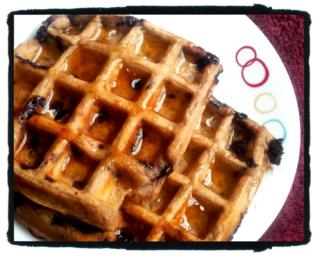

In [89]:
dataset['test'][900]['image']

In [90]:
print(predict(dataset['test'][900]['image']))

cookie


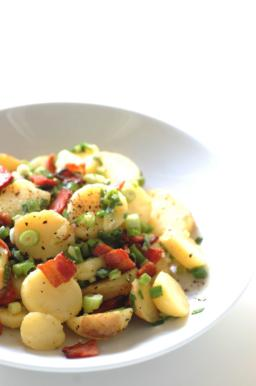

In [91]:
dataset['test'][800]['image']

In [92]:
print(predict(dataset['test'][800]['image']))

muffin


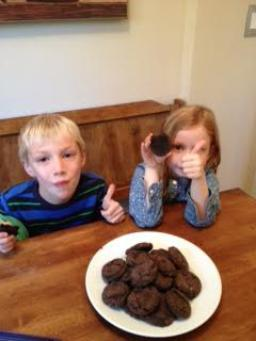

In [116]:
dataset['test'][280]['image']

In [117]:
print(predict(dataset['test'][280]['image']))

cookie


##Conclusion

The accuracy of using **Vitmodel** for this Snacks dataset is over 90%, get using 10 Epochs to eliminate the value loss in each turn of training set, get the batch-size of 16 to optimize the time-trained but can enhance the value loss of data prediction. But for the **Resnet18 model** for predicting image classification, the trained-model must be used more epochs (exactly 20) to get the approximate accuracy of 85%, for giving the example, the *resnet18* predict with the wrong result but with the *ViT model*, approximately 99% will be correctedly predicted. In total, for the optimization of time and accuray point, the *ViT model* is more efficently than using the Resnet model